In [1]:
import gym
import numpy as np
import random
from IPython.display import clear_output

# Configuración del entorno
env = gym.make("Taxi-v3", render_mode="ansi")  # Cambia render_mode según sea necesario

# Inicialización de la tabla Q
state_space_size = env.observation_space.n  # Número de estados
action_space_size = env.action_space.n      # Número de acciones
q_table = np.zeros((state_space_size, action_space_size))

# Hiperparámetros
alpha = 0.1     # Tasa de aprendizaje
gamma = 0.6     # Factor de descuento
epsilon = 1.0   # Tasa de exploración (inicialmente 100%)
epsilon_decay = 0.999  # Factor para reducir epsilon
min_epsilon = 0.1      # Mínimo valor de epsilon
episodes = 10000       # Número de episodios de entrenamiento

# Entrenamiento del agente
for episode in range(episodes):
    state, info = env.reset()  # Reiniciar el entorno y obtener el estado inicial
    done = False
    while not done:
        # Elegir acción: explorar o explotar
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explorar
        else:
            action = np.argmax(q_table[state])  # Explotar (usar política)

        # Ejecutar acción en el entorno
        next_state, reward, done, truncated, info = env.step(action)

        # Actualizar la tabla Q
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Actualizar estado actual
        state = next_state

    # Reducir epsilon (menos exploración con el tiempo)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Mostrar progreso
    if episode % 1000 == 0:
        clear_output(wait=True)
        print(f"Entrenando... Episodio {episode}/{episodes}")

print("Entrenamiento completado!")



Entrenando... Episodio 9000/10000
Entrenamiento completado!


In [ ]:

# Evaluación del agente entrenado
total_rewards = 0
test_episodes = 10

print("\nEjecutando el agente entrenado...")
for episode in range(test_episodes):
    state, info = env.reset()
    done = False
    episode_reward = 0

    while not done:
        # Mostrar el entorno en la consola
        print(env.render())  
        
        # Elegir la mejor acción (política entrenada)
        action = np.argmax(q_table[state])
        state, reward, done, truncated, info = env.step(action)
        episode_reward += reward

    total_rewards += episode_reward
    print(f"Episodio {episode + 1}: Recompensa obtenida = {episode_reward}")

env.close()
print(f"\nPromedio de recompensas en evaluación: {total_rewards / test_episodes}")

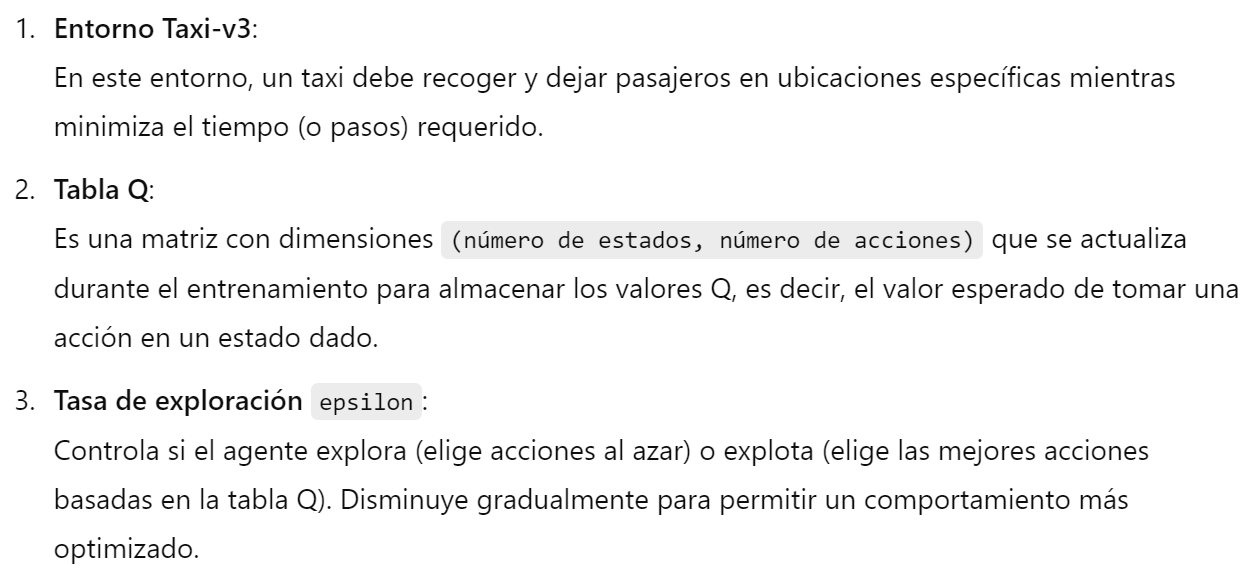

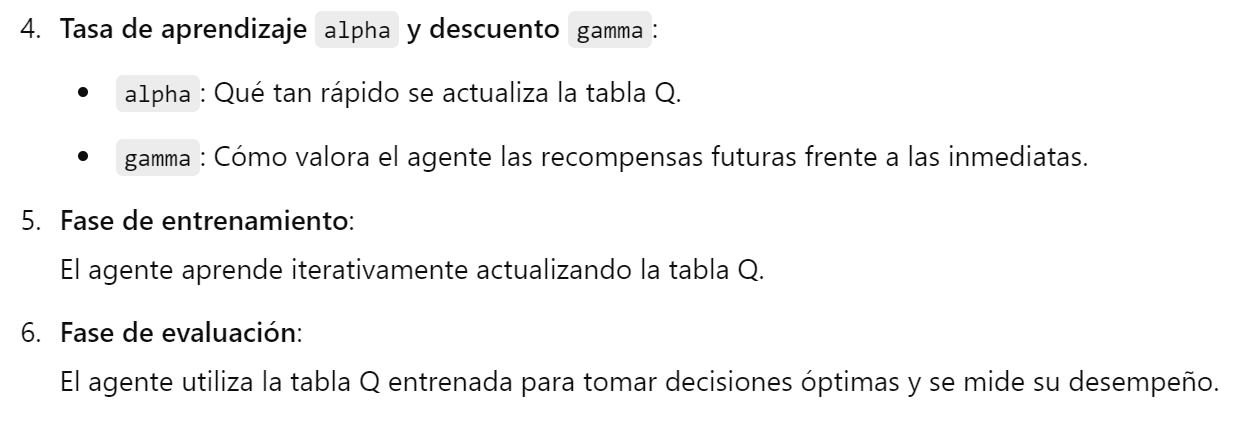

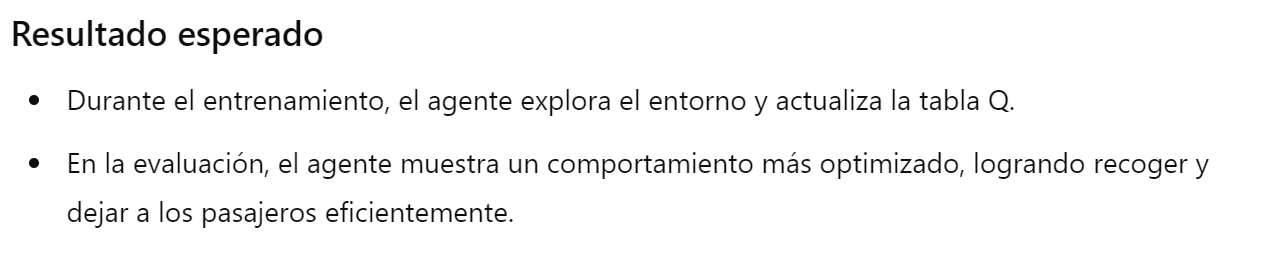